#### Importing packages

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Creating Dataframe


In [162]:
nyc_trees = pd.read_csv("original_data.csv", parse_dates=["created_at"])
print(nyc_trees.isna().sum())
print(nyc_trees.dtypes)
print(nyc_trees.columns)

created_at       0
tree_id          0
block_id         0
the_geom         0
tree_dbh         0
stump_diam       0
curb_loc         0
status           0
health        4993
spc_latin     4992
spc_common    4992
steward       4992
guards        4992
sidewalk      4992
user_type        0
problems      4992
root_stone       0
root_grate       0
root_other       0
trnk_wire        0
trnk_light       0
trnk_other       0
brnch_ligh       0
brnch_shoe       0
brnch_othe       0
address          0
zipcode          0
zip_city         0
cb_num           0
borocode         0
boroname         0
cncldist         0
st_assem         0
st_senate        0
nta              0
nta_name         0
boro_ct          0
state            0
latitude         0
longitude        0
x_sp             0
y_sp             0
dtype: int64
created_at    datetime64[ns]
tree_id                int64
block_id               int64
the_geom              object
tree_dbh               int64
stump_diam             int64
curb_loc       

### Exploring column by column
#### tree_id


In [163]:
len(nyc_trees.tree_id.unique())

100000

#### block_id


In [164]:
print((len(nyc_trees.block_id.unique())))
nyc_trees_block_id = nyc_trees.drop_duplicates(["block_id","the_geom"])
print(nyc_trees_block_id.groupby("block_id").size().eq(1).value_counts())
# No complete match?

19472
False    15497
True      3975
dtype: int64


#### the_geom

In [165]:
nyc_trees_the_geom = nyc_trees.drop_duplicates(["the_geom", "x_sp", "y_sp"])
nyc_trees_the_geom.groupby("the_geom").size().eq(1).value_counts()

True    99962
dtype: int64

#### tree_dbh

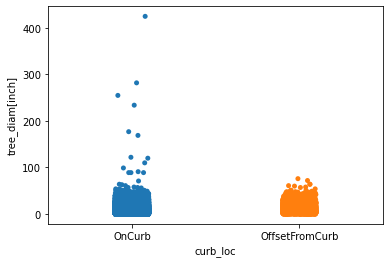

In [166]:
# Changing column name
nyc_trees.rename(columns={"tree_dbh":"tree_diam[inch]","stump_diam":"stump_diam[inch]"},inplace=True)

# Outliers in column to None
sns.stripplot(data=nyc_trees, x="curb_loc", y="tree_diam[inch]", jitter=True)
tree_dbh_lst = nyc_trees[nyc_trees["tree_diam[inch]"] >= 80].index
nyc_trees.loc[tree_dbh_lst, "tree_diam[inch]"] = None



#### Changing tree_diam and stump_diam columns.
* If stump, remove from tree_diam, replace with None
* If tree, remove value from stump_diam, replace with None

In [167]:
nyc_trees.status.value_counts()
stumps_lst = nyc_trees[nyc_trees["status"] == "Stump"].index
alive_lst = nyc_trees[nyc_trees["status"] == "Alive"].index
nyc_trees.loc[stumps_lst, "tree_diam[inch]"] = None
nyc_trees.loc[alive_lst, "stump_diam[inch]"] = None

#### curb_loc

In [168]:
# Should contain 2 categories
nyc_trees.curb_loc.value_counts()

OnCurb            96129
OffsetFromCurb     3871
Name: curb_loc, dtype: int64

#### status

In [169]:
# Should contain 3 categories
nyc_trees.status.value_counts()


Alive    95008
Stump     2831
Dead      2161
Name: status, dtype: int64

#### health

In [170]:
# Should contain 3 categories.
nyc_trees["health"].value_counts()


Good    72340
Fair    17266
Poor     5401
Name: health, dtype: int64

#### spc_latin - spc_common

In [171]:
# Checking if these columns always compare
species = nyc_trees.drop_duplicates(["spc_latin","spc_common"])
print(species.groupby("spc_latin").size().eq(1).value_counts())


True    125
dtype: int64


#### steward

In [178]:
print(nyc_trees["steward"].sample(30))

# turning into int type
def steward_int(word):
    if word is None:
        return np.nan
    elif word == "None":
        return 0
    elif type(word) == float:
        return word
    else:
        return int(word[0])

nyc_trees["steward"] = nyc_trees["steward"].apply(lambda x: steward_int(x))
print(nyc_trees["steward"].sample(30))

90013    3.0
94616    0.0
52702    1.0
64166    NaN
86391    1.0
55173    0.0
73650    0.0
82949    0.0
17879    NaN
40768    0.0
17596    0.0
16662    0.0
35967    1.0
13882    0.0
87188    1.0
64316    0.0
4527     0.0
94994    3.0
17038    1.0
85365    1.0
64432    0.0
42263    3.0
11387    1.0
50148    1.0
62567    0.0
16539    0.0
41089    1.0
51905    3.0
78349    0.0
15455    NaN
Name: steward, dtype: float64
46506    0.0
23127    1.0
78097    1.0
88467    0.0
19584    1.0
76569    0.0
55819    0.0
1175     1.0
68919    0.0
1605     0.0
65957    1.0
36798    0.0
38125    0.0
84767    1.0
86828    0.0
34581    0.0
36920    0.0
12169    0.0
12053    0.0
77371    0.0
12769    1.0
67304    3.0
52871    NaN
43917    1.0
44987    NaN
11105    0.0
43993    1.0
49520    0.0
6632     0.0
27031    0.0
Name: steward, dtype: float64


#### guards

In [179]:
print(nyc_trees["guards"].value_counts())
# Clean the None for Unsure


None       78958
Helpful    10244
Harmful     4552
Unsure      1254
Name: guards, dtype: int64
